In [3]:
import requests
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import json
from config import weather_api_key

In [4]:
url = "https://api.openweathermap.org/data/3.0/onecall/timemachine?"
units = "imperial"

# Reading CSV Data

In [5]:
# Reading the CSV
uber_csv = pd.read_csv("Resources/uber.csv")

uber_df = pd.DataFrame(uber_csv)

uber_df.head()



,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
# Renaming the headers
uber_df.rename(columns = {'Unnamed: 0':'ID', 'key':'N/A', 'fare_amount':'Charge', "pickup_datetime":"Pickup Time",  "pickup_longitude": "Pickup Lon", "pickup_latitude":"Pickup Lat",  
                          "dropoff_longitude": "Dropoff Lon", "dropoff_latitude": "Dropoff Lat", "passenger_count": "Passenger Count"}, inplace = True)

uber_df.head()



,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
# Grabbing a sample of the data
uber_df3 = uber_df.sample(n=5)
uber_df3.head()

,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count
67687,22408033,2012-10-23 15:39:00.00000015,4.0,2012-10-23 15:39:00 UTC,-73.949480,40.781132,-73.951587,40.778127,1
114624,15707080,2011-10-17 07:30:00.00000093,4.1,2011-10-17 07:30:00 UTC,-73.951985,40.773277,-73.953560,40.781187,2
13844,33198722,2009-12-21 22:53:00.000000160,10.5,2009-12-21 22:53:00 UTC,-73.997660,40.741697,-73.978450,40.777348,1
168869,45652367,2010-04-03 18:12:00.00000045,11.3,2010-04-03 18:12:00 UTC,-73.980915,40.733763,-73.990112,40.769578,1
89648,45594596,2012-01-02 02:31:00.00000024,4.9,2012-01-02 02:31:00 UTC,-73.987465,40.733487,-73.993905,40.736155,1


# Formatting Data

In [8]:
# Formatting the date step one
uber_df3['Date Formatted'] = (pd.to_datetime(uber_df3['Pickup Time'], yearfirst=True, utc=True)) 
 
uber_df3.head()


,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted
67687,22408033,2012-10-23 15:39:00.00000015,4.0,2012-10-23 15:39:00 UTC,-73.949480,40.781132,-73.951587,40.778127,1,2012-10-23 15:39:00+00:00
114624,15707080,2011-10-17 07:30:00.00000093,4.1,2011-10-17 07:30:00 UTC,-73.951985,40.773277,-73.953560,40.781187,2,2011-10-17 07:30:00+00:00
13844,33198722,2009-12-21 22:53:00.000000160,10.5,2009-12-21 22:53:00 UTC,-73.997660,40.741697,-73.978450,40.777348,1,2009-12-21 22:53:00+00:00
168869,45652367,2010-04-03 18:12:00.00000045,11.3,2010-04-03 18:12:00 UTC,-73.980915,40.733763,-73.990112,40.769578,1,2010-04-03 18:12:00+00:00
89648,45594596,2012-01-02 02:31:00.00000024,4.9,2012-01-02 02:31:00 UTC,-73.987465,40.733487,-73.993905,40.736155,1,2012-01-02 02:31:00+00:00


In [9]:
# Final Formatted date added to dataframe
uber_df3['Date Formatted Final'] = (uber_df3["Date Formatted"] - pd.Timestamp("1970-01-01", tz="UTC")) // pd.Timedelta('1s')

uber_df3.head()

,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted,Date Formatted Final
67687,22408033,2012-10-23 15:39:00.00000015,4.0,2012-10-23 15:39:00 UTC,-73.949480,40.781132,-73.951587,40.778127,1,2012-10-23 15:39:00+00:00,1351006740
114624,15707080,2011-10-17 07:30:00.00000093,4.1,2011-10-17 07:30:00 UTC,-73.951985,40.773277,-73.953560,40.781187,2,2011-10-17 07:30:00+00:00,1318836600
13844,33198722,2009-12-21 22:53:00.000000160,10.5,2009-12-21 22:53:00 UTC,-73.997660,40.741697,-73.978450,40.777348,1,2009-12-21 22:53:00+00:00,1261435980
168869,45652367,2010-04-03 18:12:00.00000045,11.3,2010-04-03 18:12:00 UTC,-73.980915,40.733763,-73.990112,40.769578,1,2010-04-03 18:12:00+00:00,1270318320
89648,45594596,2012-01-02 02:31:00.00000024,4.9,2012-01-02 02:31:00 UTC,-73.987465,40.733487,-73.993905,40.736155,1,2012-01-02 02:31:00+00:00,1325471460


In [10]:
#Creating the clean dataframe
clean_df = uber_df3[["ID", "Charge", "Pickup Lon", "Pickup Lat", "Dropoff Lon", "Dropoff Lat", "Passenger Count", "Date Formatted Final" ]]


clean_df.head()

,ID,Charge,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted Final
67687,22408033,4.0,-73.949480,40.781132,-73.951587,40.778127,1,1351006740
114624,15707080,4.1,-73.951985,40.773277,-73.953560,40.781187,2,1318836600
13844,33198722,10.5,-73.997660,40.741697,-73.978450,40.777348,1,1261435980
168869,45652367,11.3,-73.980915,40.733763,-73.990112,40.769578,1,1270318320
89648,45594596,4.9,-73.987465,40.733487,-73.993905,40.736155,1,1325471460


# Gathering info for our hypothesis tests

In [11]:
# Making the list for data 
uber_data = []

# Looping through the data
for i, row in clean_df.iterrows():

    # Gathering the latitude, longitude, and pickup time
    lat = row['Pickup Lat']
    lon = row['Pickup Lon']
    date = row['Date Formatted Final'].astype(int)
    
    # Making the query for the search using the varibles
    query_url = f"{url}lat={lat}&lon={lon}&dt={date}&appid={weather_api_key}&units={units}"
    
    # Getting the info from the api
    response = requests.get(query_url).json()

    # Gathering variables for statistics
    temp = response['data'][0]['temp']
    hum = response['data'][0]['humidity']
    desc = response['data'][0]['weather'][0]['description']

    # Placing variables into a dictionary
    uber_data.append({"Pickup Lat": lat,
                            "Temp (F)": temp,
                            "Humidity %": hum,
                            "Description": desc
    })


    
    
   

In [12]:
# Making the weather dataframe
weather_df = pd.DataFrame(uber_data)

weather_df.head()

,Pickup Lat,Temp (F),Humidity %,Description
0,40.781132,63.41,53,light rain
1,40.773277,61.25,61,overcast clouds
2,40.741697,33.85,51,clear sky
3,40.733763,65.43,49,clear sky
4,40.733487,50.41,86,light rain


In [13]:
# Merging the data for statistical use
final_df = clean_df.merge(weather_df, on = "Pickup Lat")

final_df.head()

,ID,Charge,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted Final,Temp (F),Humidity %,Description
0,22408033,4.0,-73.949480,40.781132,-73.951587,40.778127,1,1351006740,63.41,53,light rain
1,15707080,4.1,-73.951985,40.773277,-73.953560,40.781187,2,1318836600,61.25,61,overcast clouds
2,33198722,10.5,-73.997660,40.741697,-73.978450,40.777348,1,1261435980,33.85,51,clear sky
3,45652367,11.3,-73.980915,40.733763,-73.990112,40.769578,1,1270318320,65.43,49,clear sky
4,45594596,4.9,-73.987465,40.733487,-73.993905,40.736155,1,1325471460,50.41,86,light rain


In [14]:
weather_labels = final_df["Description"].unique()
weather_count = final_df["Description"].value_counts()
weather_count

light rain         2
clear sky          2
overcast clouds    1
Name: Description, dtype: int64

# Graphing the data
Now we must take a closer look to understand this data

In [15]:
# Creating a linear regression fuction
def lregress(x, y, var):
    
    res = stats.linregress(x, y)

    print(f"R-squared: {res.rvalue**2:.6f}")

    plt.scatter(x, y, marker="d", color="red", label= "Data")
    plt.plot(x, res.intercept + res.slope*x, label = "Regression Line")
    plt.title("Linear Regression")
    plt.xlabel("Latitude")
    plt.ylabel(f"{var}")
    plt.legend()
    plt.show()

## Weather vs. Uber Rides



([<matplotlib.patches.Wedge at 0x20806da79c8>,
 [Text(0.33991867422268784, 1.0461621742897658, 'light rain'),
  Text(-0.8899186574910393, -0.6465638275138399, 'overcast clouds'),
  Text(0.8899187482945414, -0.6465637025335375, 'clear sky')],
 [Text(0.1854101859396479, 0.5706339132489631, '40.0%'),
  Text(-0.48541017681329407, -0.3526711786439127, '40.0%'),
  Text(0.4854102263424771, -0.3526711104728386, '20.0%')])

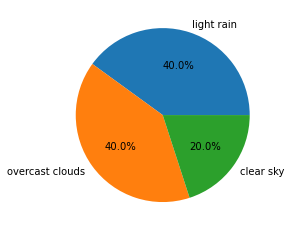

In [16]:
plt.pie(weather_count, labels = weather_labels, autopct = "%1.1f%%")


([0, 1, 2], <a list of 3 Text major ticklabel objects>)

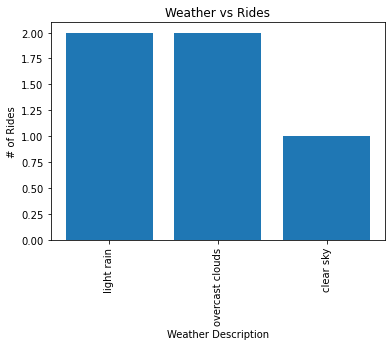

In [29]:
plt.bar(weather_labels, weather_count)
plt.title("Weather vs Rides")
plt.xlabel("Weather Description")
plt.ylabel("# of Rides")
plt.xticks(rotation = 90)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

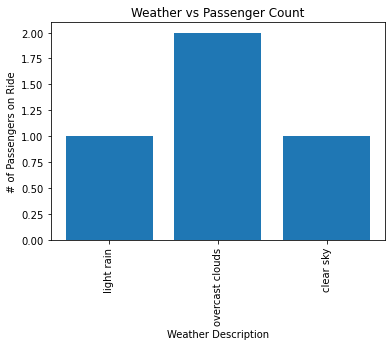

In [28]:
plt.bar(final_df["Description"], final_df["Passenger Count"])
plt.title("Weather vs Passenger Count")
plt.xlabel("Weather Description")
plt.ylabel("# of Passengers on Ride")
plt.xticks(rotation = 90)


([0, 1, 2], <a list of 3 Text major ticklabel objects>)

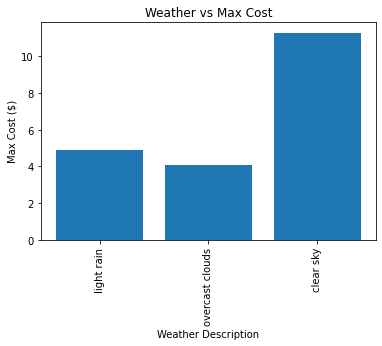

In [27]:
plt.bar(final_df["Description"], final_df["Charge"])
plt.title("Weather vs Max Cost")
plt.xlabel("Weather Description")
plt.ylabel("Max Cost ($)")
plt.xticks(rotation = 90)

## Latitude vs. Weather

Text(0, 0.5, 'Temperature (F)')

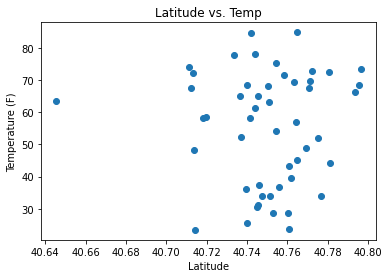

In [ ]:
plt.scatter(final_df["Pickup Lat"], final_df["Temp (F)"])
plt.title("Latitude vs. Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

R-squared: 0.000060


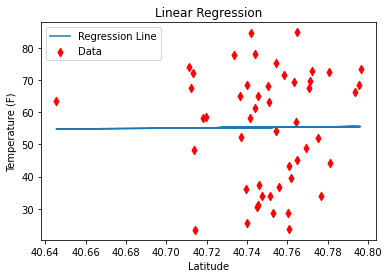

In [ ]:
lregress(final_df["Pickup Lat"], final_df["Temp (F)"], "Temperature (F)")